# Theoretical SERs for Popular modulations 

## BPSK, QPSK, 16-QAM

In [2]:

import numpy as np
import matplotlib.pyplot as plt 
from util.error import *
from core.core import *


In [3]:

def qfunc(x: np.ndarray, type='bpsk'):
    type_available = ('bpsk', 'qpsk', '16-qam')
    
    if type=='16-qam':
        result = np.array([1/2 * np.math.erfc(i/np.sqrt(10)) for i in x])
    else: 
        result = np.array([1/2 * np.math.erfc(i/np.sqrt(2)) for i in x])
    return result

In [9]:
def compute_ser(qfuncs: np.ndarray, type='bpsk'):
    """Computes Theoretical ser with given q-functions"""
    type_available = ('bpsk', 'qpsk', '16-qam')

    if type == 'bpsk':
        result = qfuncs
    elif type == 'qpsk':
        result = 1-(1-qfuncs)**2
    else:
        result = 1-(1-(3/2)*qfuncs)**2
    result = np.average(result)
    return result


In [15]:
compute_ser(qfunc(np.sqrt(snr)))

0.14555661165887243

In [3]:
snrs_db = np.linspace(0, 15, 16, dtype=np.int32) 
snrs_db = snrs_db.reshape(-1, 1)
snrs = 10 ** (snrs_db/10)

# number of monte-carlo samples
N = 10000

# Generate Rayleigh fading coefficient samples
h = np.random.randn(N, 1) + 1j * np.random.randn(N, 1)

# compute monte-carlo snrs for each snr by broadcasting 
snr_mc = snrs * (np.abs(h)**2).T 

# given monte-carlo snrs
ser_rayleigh_theory = []
ser_rayleigh_qpsk = []
ser_rayleigh_qam = []
ser_awgn_theory = []
ser_awgn_qpsk = []
ser_awgn_qam = []

for i, snr in enumerate(snr_mc):
    ser_rayleigh_theory.append(compute_ser(qfunc(np.sqrt(snr))))
    ser_rayleigh_qpsk.append(compute_ser(qfunc(np.sqrt(snr)), type='qpsk'))
    ser_rayleigh_qam.append(compute_ser(qfunc(np.sqrt(snr), type='16-qam'), type='16-qam'))

    ser_awgn_theory.append(compute_ser(qfunc(np.sqrt(snrs[i]))))
    ser_awgn_qpsk.append(compute_ser(qfunc(np.sqrt(snrs[i])), type='qpsk'))
    ser_awgn_qam.append(compute_ser(qfunc(np.sqrt(snrs[i]), type='16-qam'), type='16-qam'))


## All in one Graph
### Rayleigh fading channel and AWGN channel 

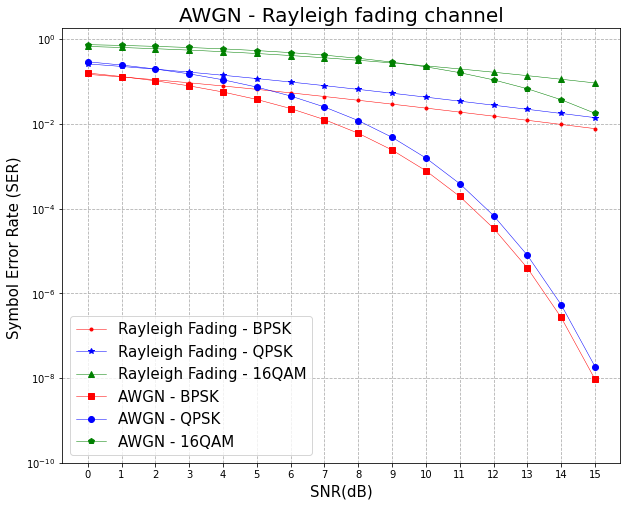

In [4]:
# all in one plot 
plt.figure(figsize=(10, 8))
plt.semilogy(ser_rayleigh_theory, '.-r', linewidth=.5, label='Rayleigh Fading - BPSK')
plt.semilogy(ser_rayleigh_qpsk, '*-b', linewidth=.5, label='Rayleigh Fading - QPSK')
plt.semilogy(ser_rayleigh_qam, '^-g', linewidth=.5, label="Rayleigh Fading - 16QAM")
plt.semilogy(ser_awgn_theory, 's-r', linewidth=.5, label='AWGN - BPSK')
plt.semilogy(ser_awgn_qpsk, 'o-b',linewidth=.5, label='AWGN - QPSK')
plt.semilogy(ser_awgn_qam, 'p-g', linewidth=.5, label='AWGN - 16QAM')
plt.xticks(np.arange(0, 16, dtype=np.int32))
plt.yticks([1e0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])
plt.title("AWGN - Rayleigh fading channel", fontsize=20)
plt.xlabel("SNR(dB)", fontsize=15)
plt.ylabel("Symbol Error Rate (SER) ", fontsize=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15)
plt.show()

## AWGN channel 

### BPSK, QPSK, 16-QAM

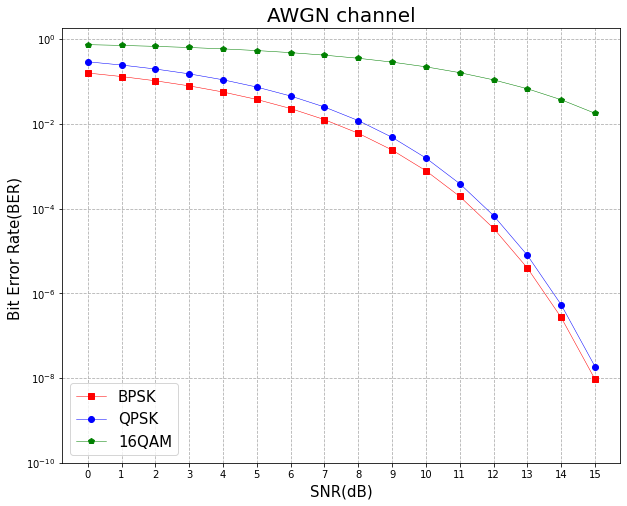

In [5]:
# AWGN channel plot
plt.figure(figsize=(10, 8))
plt.semilogy(ser_awgn_theory, 's-r', linewidth=.5, label='BPSK')
plt.semilogy(ser_awgn_qpsk, 'o-b',linewidth=.5, label='QPSK')
plt.semilogy(ser_awgn_qam, 'p-g', linewidth=.5, label='16QAM')
plt.xticks(np.arange(0, 16, dtype=np.int32))
plt.yticks([1e0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])
plt.title("AWGN channel", fontsize=20)
plt.xlabel("SNR(dB)", fontsize=15)
plt.ylabel("Bit Error Rate(BER) ", fontsize=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15)
plt.show()

## Rayleigh fading channel 

### BPSK, QPSK, 16-QAM 

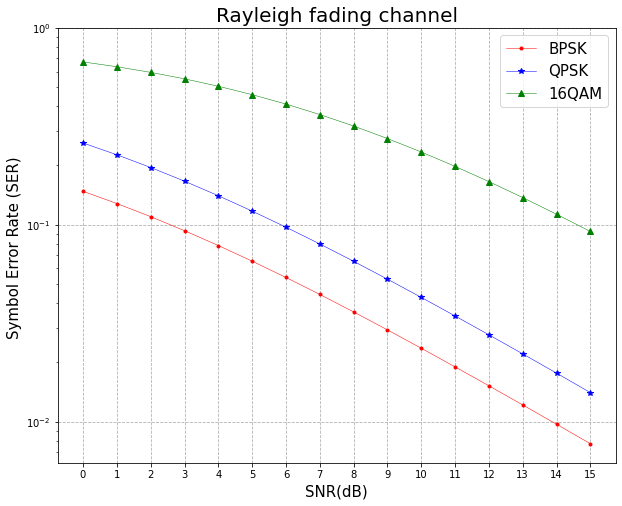

In [6]:
plt.figure(figsize=(10, 8))
plt.semilogy(ser_rayleigh_theory, '.-r', linewidth=.5, label='BPSK')
plt.semilogy(ser_rayleigh_qpsk, '*-b', linewidth=.5, label='QPSK')
plt.semilogy(ser_rayleigh_qam, '^-g', linewidth=.5, label="16QAM")
plt.xticks(np.arange(0, 16, dtype=np.int32))
plt.yticks([1e0, 1e-1, 1e-2, ])
plt.title("Rayleigh fading channel", fontsize=20)
plt.xlabel("SNR(dB)", fontsize=15)
plt.ylabel("Symbol Error Rate (SER) ", fontsize=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15)
plt.show()